In [60]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
delivery_data=pd.read_csv("/content/sample_data/delivery_time.csv")
delivery_data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# **EDA and vizualization**

In [62]:
delivery_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [63]:
delivery_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Delivery Time,21.0,16.790952,5.074901,8.0,13.5,17.83,19.75,29.0
Sorting Time,21.0,6.190476,2.542028,2.0,4.0,6.00,8.00,10.0


Box plot for Delivery Time


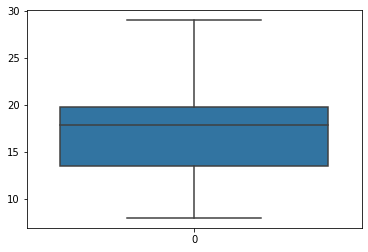

Box plot for Sorting Time


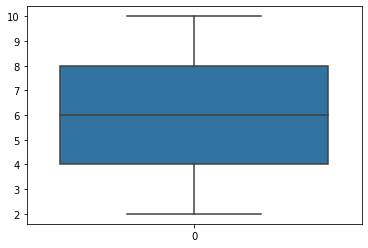

In [64]:
#lets do data vizualization through plot
for i in delivery_data.columns:
  print("Box plot for {}".format(i))
  sns.boxplot(delivery_data[i])
  plt.show()

Box plot for Delivery Time


<ipython-input-65-238f567ad74d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(delivery_data[i])


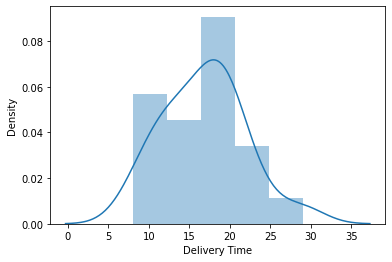

Box plot for Sorting Time


<ipython-input-65-238f567ad74d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(delivery_data[i])


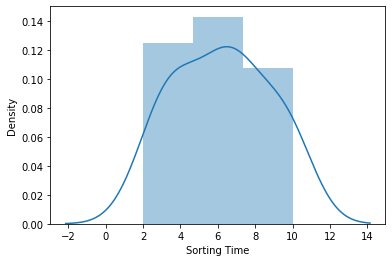

In [65]:
for i in delivery_data.columns:
  print("Box plot for {}".format(i))
  sns.distplot(delivery_data[i])
  plt.show()

# **correlation analysis**

In [66]:
#lets rename the columns
delivery_data=delivery_data.rename({'Delivery Time':'Delivery_time','Sorting Time':'Sorting_time'},axis=1)
delivery_data.head(2)

,Delivery_time,Sorting_time
0,21.0,10
1,13.5,4


In [67]:
delivery_data.corr()

,Delivery_time,Sorting_time
Delivery_time,1.000000,0.825997
Sorting_time,0.825997,1.000000


<Axes: xlabel='Sorting_time', ylabel='Delivery_time'>

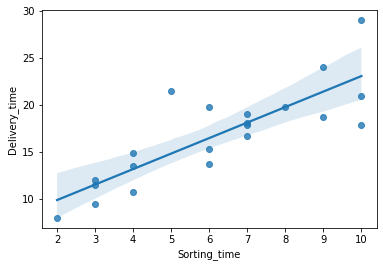

In [68]:
sns.regplot(x=delivery_data['Sorting_time'],y=delivery_data['Delivery_time'])

# **Model building and prediction**

In [69]:
import statsmodels.formula.api as smf
model=smf.ols('Delivery_time~Sorting_time',data=delivery_data).fit()
print(model.params)

Intercept       6.582734
Sorting_time    1.649020
dtype: float64


In [70]:
print(model.pvalues,"\n",model.tvalues)

Intercept       0.001147
Sorting_time    0.000004
dtype: float64 
 Intercept       3.823349
Sorting_time    6.387447
dtype: float64


In [71]:
# Finding Rsquared values
print(model.rsquared," \n ",model.rsquared_adj)

0.6822714748417231  
  0.6655489208860244


In [72]:
#lets predict for sorting time =5 and 10

new_data=pd.Series([5,10])
data_pred=pd.DataFrame(new_data,columns=['Sorting_time'])
model.predict(data_pred)

0    14.827833
1    23.072933
dtype: float64

In [73]:
#using linearRegression  model
from sklearn.linear_model import LinearRegression

x=delivery_data[['Sorting_time']]
y=delivery_data[['Delivery_time']]
reg_model=LinearRegression()
reg_model.fit(x,y)

LinearRegression()

In [74]:
new_data=pd.Series([5,10])
data_pred=pd.DataFrame(new_data,columns=['Sorting_time'])
y_pred=reg_model.predict(data_pred)
y_pred

array([[14.82783346],
       [23.07293294]])

In [75]:
#both prediction are coming same

In [76]:
#lets do different transformation such as LOG,SQRT,CBRT
from sklearn.preprocessing import FunctionTransformer


# LOG

In [77]:
delivery_log=pd.read_csv("/content/sample_data/delivery_time.csv")
delivery_log=delivery_log.rename({'Delivery Time':'Delivery_time','Sorting Time':'Sorting_time'},axis=1)
delivery_log.head()

,Delivery_time,Sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [78]:
tr1=FunctionTransformer(func=np.log1p)
delivery_log['Sorting_log']=tr1.fit_transform(delivery_log.Sorting_time)
delivery_log.head()

,Delivery_time,Sorting_time,Sorting_log
0,21.00,10,2.397895
1,13.50,4,1.609438
2,19.75,6,1.945910
3,24.00,9,2.302585
4,29.00,10,2.397895


In [79]:
model_log=smf.ols('Delivery_time~Sorting_log',data=delivery_log).fit()

In [80]:
print('params',"\n",model_log.params)
print("Rsqr")
print(model_log.rsquared,model_log.rsquared_adj)

params 
 Intercept      -4.099013
Sorting_log    10.959246
dtype: float64
Rsqr
0.6970476042045002 0.6811027412678949


In [81]:
new_data=pd.Series([np.log(5),np.log(10)])
data_pred=pd.DataFrame(new_data,columns=['Sorting_log'])
model_log.predict(data_pred)

0    13.539214
1    21.135584
dtype: float64

# SQRT

In [82]:
delivery_sqrt=pd.read_csv("/content/sample_data/delivery_time.csv")
delivery_sqrt=delivery_sqrt.rename({'Delivery Time':'Delivery_time','Sorting Time':'Sorting_time'},axis=1)
delivery_sqrt.head()

,Delivery_time,Sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [83]:
tr2=FunctionTransformer(func=np.sqrt)
delivery_sqrt['Sorting_sqrt']=tr2.fit_transform(delivery_sqrt.Sorting_time)
delivery_sqrt.head()

,Delivery_time,Sorting_time,Sorting_sqrt
0,21.00,10,3.162278
1,13.50,4,2.000000
2,19.75,6,2.449490
3,24.00,9,3.000000
4,29.00,10,3.162278


In [84]:
model_sqrt=smf.ols('Delivery_time~Sorting_sqrt',data=delivery_sqrt).fit()

In [85]:
print('params',"\n",model_sqrt.params)
print("Rsqr")
print(model_sqrt.rsquared,model_sqrt.rsquared_adj)

params 
 Intercept      -2.518837
Sorting_sqrt    7.936591
dtype: float64
Rsqr
0.695806227630867 0.6797960290851232


In [86]:
new_data=pd.Series([np.sqrt(5),np.sqrt(10)])
data_pred=pd.DataFrame(new_data,columns=['Sorting_sqrt'])
model_sqrt.predict(data_pred)

0    15.227920
1    22.578867
dtype: float64

# CBRT

In [87]:
delivery_cbrt=pd.read_csv("/content/sample_data/delivery_time.csv")
delivery_cbrt=delivery_cbrt.rename({'Delivery Time':'Delivery_time','Sorting Time':'Sorting_time'},axis=1)
delivery_cbrt.head()

,Delivery_time,Sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [88]:
tr3=FunctionTransformer(np.cbrt)
delivery_cbrt['Sortting_cbrt']=tr3.fit_transform(delivery_cbrt.Sorting_time)
delivery_cbrt.head()

,Delivery_time,Sorting_time,Sortting_cbrt
0,21.00,10,2.154435
1,13.50,4,1.587401
2,19.75,6,1.817121
3,24.00,9,2.080084
4,29.00,10,2.154435


In [89]:
model_cbrt=smf.ols('Delivery_time~Sortting_cbrt',data=delivery_cbrt).fit()

In [90]:
print('params',"\n",model_cbrt.params)
print("Rsqr")
print(model_cbrt.rsquared,model_cbrt.rsquared_adj)

params 
 Intercept       -11.579201
Sortting_cbrt    15.767284
dtype: float64
Rsqr
0.6974182292354245 0.6814928728793943


In [91]:
new_data=pd.Series([np.cbrt(5),np.cbrt(10)])
data_pred=pd.DataFrame(new_data,columns=['Sortting_cbrt'])
model_cbrt.predict(data_pred)

0    15.382474
1    22.390381
dtype: float64